In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import scipy.optimize as sopt

from sklearn import datasets
from sklearn import metrics

In [5]:
sys.path.append('../')
from common.gradients import check_gradient, numerical_gradient, encode_params, decode_params

# Problem 1



$\dfrac{\partial J^{(i)}}{\partial a_k^{(i)}} 
=\dfrac{\partial \left(-\displaystyle\sum_{k=1}^{K}[y^{(i)} = k] \log o_k^{(i)}\right)}{\partial a_k^{(i)}}
=\dfrac{\partial \left(-\displaystyle\sum_{k=1}^{K}[y^{(i)} = k] \log \frac{\exp {a_k^{(i)}}}{\sum_{j = 1}^K \exp a_j^{(i)}} \right)}{\partial a_k^{(i)}} 
$

$
=\dfrac{\partial \left(-\displaystyle\sum_{k=1}^{K}[y^{(i)} = k] \cdot \left( \log (\exp {a_k^{(i)}}) - \log \sum_{j = 1}^K \exp a_j^{(i)}\right) \right)}{\partial a_k^{(i)}} 
=\dfrac{\partial \left(-\displaystyle\sum_{k=1}^{K}[y^{(i)} = k] \cdot \left( a_k^{(i)} - \log \sum_{j = 1}^K \exp a_j^{(i)}\right) \right)}{\partial a_k^{(i)}} 
$

$
=\dfrac{\partial \left(-\displaystyle\sum_{k=1}^{K}[y^{(i)} = k] \cdot a_k^{(i)} \right)}{\partial a^{(i)}_k}
+ \dfrac{\partial \left(\displaystyle\sum_{k=1}^{K}[y^{(i)} = k] \cdot \log \sum_{j=1}^{K} \exp a_j^{(i)} \right)}{\partial a^{(i)}_k} 
$

$
= \dfrac{\partial \left(\log \displaystyle\sum_{j=1}^{K} \exp a_j^{(i)} \cdot \displaystyle\sum_{k=1}^{K}[y^{(i)} = k]  \right)}{\partial a^{(i)}_k}  - [y^{(i)} = k]
= \dfrac{\partial \left(\log \sum_{j=1}^{K} \exp a_j^{(i)} \right)}{\partial a^{(i)}_k}  - [y^{(i)} = k]$

$
= \dfrac{
\dfrac{\partial \left(\sum_{j=1}^{K} \exp a_j^{(i)} \right)}{\partial a^{(i)}_k}
}
{\sum_{j=1}^{K} \exp a_j^{(i)}} - [y^{(i)} = k]
= \dfrac{
\dfrac{\partial \exp a_k^{(i)}}{\partial a^{(i)}_k}
}
{\sum_{j=1}^{K} \exp a_j^{(i)}} - [y^{(i)} = k]
= \dfrac{
\exp a_k^{(i)}
}
{\sum_{j=1}^{K} \exp a_j^{(i)}} - [y^{(i)} = k]
= o_k - [y^{(i)} = k]
$

# Problem 2

$\dfrac{\exp (a_k + c)}{\sum \exp (a_j + c)}$
$= \dfrac{\exp a_k \cdot \exp c}{\sum \exp a_j \cdot \exp c}$
$= \dfrac{\exp a_k \cdot \exp c}{\exp c \cdot \sum \exp a_j}$
$= \dfrac{\exp a_k}{\sum \exp a_j} = o_k$

Nothings happen.

Logistic regression:

$p(class = 1 \lvert x, \ddot\Theta) = h_{\ddot\Theta} (x) = \sigma \left( \ddot\Theta x \right) = \dfrac{1}{1 + \exp (-\ddot\Theta x)} $

Softmax $K = 2$:

$p(class = 1 \lvert x, \Theta) = \dfrac{\exp a_k}{\sum_{j=1}^{K} \exp a_j} = \dfrac{\exp a_1}{\exp a_1 + \exp a_2}
$

$= \dfrac{\exp a_1 \cdot \exp (-a_1)}{(\exp a_1 + \exp a_2) \exp (-a_1)} = \dfrac{1}{1 - \exp (a_2 - a_1)}$


$= \dfrac{1}{1 - \exp (a_2 - a_1)} = \dfrac{1}{1 - \exp (\Theta_2x - \Theta_1x)} = \dfrac{1}{1 - \exp (\ddot\Theta x)}$

They're equivalent.

# Problem 3

IrisXFull is a (5, 150)-shaped matrix of float64
IrisX2feats is a (3, 150)-shaped matrix of float64
IrisY is a (1, 150)-shaped matrix of int64


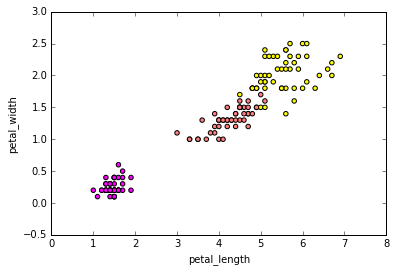

In [6]:
#
# Here we load the IRIS dataset.
# We will create two datasets: one using all features, and one using just Petal Langth and Petal Width for visualizations
#
iris = datasets.load_iris()
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

IrisXFull = np.vstack([np.ones_like(petal_length), iris.data.T])
IrisX2feats = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisY = iris.target.reshape(1,-1).astype(np.int64)

print("IrisXFull is a {}-shaped matrix of {}".format(IrisXFull.shape, IrisXFull.dtype))
print("IrisX2feats is a {}-shaped matrix of {}".format(IrisX2feats.shape, IrisX2feats.dtype))
print("IrisY is a {}-shaped matrix of {}".format(IrisY.shape, IrisY.dtype))

scatter(IrisX2feats[1,:], IrisX2feats[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [7]:
def SoftMaxRegression_implementation(ThetaFlat, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient
    
    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters containing (n_features*n_classes) entries
    X :
        array of features, shape n_features x n_samples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the loss and gradient is computed on the X,Y pairs
    """
    #X is num_features x num_samples
    num_features, num_samples = X.shape

    #Theta is num_features x num_classes
    #we first reshape ThetaFlat into Theta
    Theta = ThetaFlat.reshape(num_features, -1)

    num_classes = Theta.shape[1]
    
    #Activation of softmax neurons
    #A's shape should be num_classes x num_samples
    #
    
    A = np.dot(Theta.T, X)
    
    #Now compute the SoftMax function
    #O will be a num_classes x num_samples matrix of probabilities assigned by our model  
    #Stability optimization - for each subtract the maximum activation
    O = A - A.max(0, keepdims=True)
    
    #
    # TODO - compute SoftMax as vector O. Take the exp and normalize, so all values of O
    #        would sum to 1.0.
    #
    
    Osum = (1 / sum(np.exp(O), 0))
    O = np.exp(O) * Osum
    
    if return_probabilities:
        return O
    
    #The loss is the average per-sample nll (neg log likelihood)
    #The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0 / num_samples * np.sum(correct_class_likelihoods)

    #For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    #Please fill in its computation
    
    Yeqk = (np.tile(np.arange(num_classes).reshape(num_classes, 1), (num_samples,)) == Y).astype(np.float)
    
    dLdA = (O - Yeqk)
    
    #Now we compute the gradient of the loss with respect to Theta
    dLdTheta = np.dot(X, dLdA.T) / num_samples
    
    #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdTheta.reshape(ThetaFlat.shape)

#Make a function for training on irises
iris_log_reg_cost = lambda Theta: SoftMaxRegression_implementation(Theta, IrisXFull, IrisY, False)
#Make sure that the gradient computation is OK
check_gradient(iris_log_reg_cost, np.zeros((3*5,)))
check_gradient(iris_log_reg_cost, np.random.rand(3*5)*2.0-1.0)

True

In [8]:
#
# Call a solver
#

#iprint will cause the solver to print TO THE TERMINAL from which ipython notebook was started
ThetaOpt = sopt.fmin_l_bfgs_b(iris_log_reg_cost, np.zeros((3*5,)), iprint=1)[0]

check_gradient(iris_log_reg_cost, ThetaOpt)

True

In [9]:
#
# Compute training errors
#

probabilities = SoftMaxRegression_implementation(ThetaOpt, IrisXFull, return_probabilities=True)
predictions = np.argmax(probabilities,0)

print("Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100))

Training accurracy: 98.666667%


In [10]:
#
# Now redo the training for two features
#
# TODO - again, use l_bfgs to find optimal theta, then compute probabilities and new predictions.
#

iris_log_reg_cost = lambda Theta: SoftMaxRegression_implementation(Theta, IrisX2feats, IrisY, False)

Theta2class = sopt.fmin_l_bfgs_b(iris_log_reg_cost, np.zeros((3*3,)), iprint=1)[0]

check_gradient(iris_log_reg_cost, ThetaOpt)

probabilities = SoftMaxRegression_implementation(Theta2class, IrisX2feats, return_probabilities=True)
predictions = np.argmax(probabilities,0)

print("Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100))

Training accurracy: 96.000000%


In [137]:
#
# Now plot the decision boundary
# 

petal_lengths, petal_widths = np.meshgrid(np.linspace(IrisX2feats[1,:].min(), IrisX2feats[1,:].max(), 100),
                                          np.linspace(IrisX2feats[2,:].min(), IrisX2feats[2,:].max(), 100))

IrisXGrid = np.vstack([np.ones(np.prod(petal_lengths.shape)), petal_lengths.ravel(), petal_widths.ravel()])
predictions_Grid = SoftMaxRegression_implementation(Theta2class, IrisXGrid, return_probabilities=True).argmax(0)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


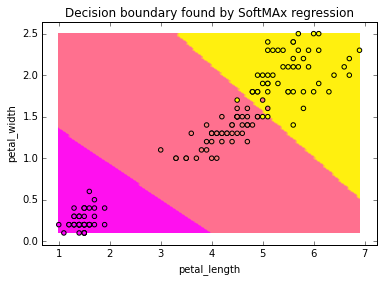

In [138]:
contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
scatter(IrisX2feats[1,:], IrisX2feats[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')
title('Decision boundary found by SoftMAx regression')

# Problem 4

Please note, that we **move the addition of the bias term** into the network implementation! Please note, that typically instead of changing the inputs we keep another vector of bias terms.

In [11]:
def TwoLayerNet_implementation(ThetaFlat, ThetaShapes, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient
    
    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters
    ThetaShapes :
        list of shapes of weight and bias matrices
    X :
        array of features, shape n_features x n_smaples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the los and gradient is computed on the X,Y pairs
    """
    #X is num_features x num_samples
    num_features, num_samples = X.shape

    #Extract weight matrices
    W1, W2 = decode_params(ThetaFlat, ThetaShapes)
    
    X_padded = np.vstack([np.ones((1, num_samples)), X])
    
    # Activation in first layer. Shape is num_hidden x num_samples
    
    A1 = np.dot(W1.T, X_padded)
    
    # Apply the transfer function
    # Should I compute the tanh indirectly from the formula with the exponents ???
    
    H1 = np.tanh(A1)
    
    #Pad with zeros
    H1_padded = np.vstack([np.ones((1, num_samples)), H1])
    
    #Now apply the second linear transform
    
    A2 = np.dot(W2.T, H1_padded)
        
    # Now compute the SoftMax function
    # O will be a num_classes x num_samples matrix of probabilities assigned by our model  
    # Stability optimization - for each subtract the maximum activation
    
    O = A2 - A2.max(0, keepdims=True)
    
    # Compute SoftMax as vector O. Take the exp and normalize, so all values of O
    # would sum to 1.0.
    
    Osum = (1 / sum(np.exp(O), 0))
    O = np.exp(O) * Osum

    if return_probabilities:
        return O
    
    #The loss is the average per-sample nll (neg log likelihood)
    #The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0 / num_samples * np.sum(correct_class_likelihoods)

    #For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    #Please fill in its computation
    
    num_classes = W2.shape[1]
    
    Yeqk = (np.tile(np.arange(num_classes).reshape(num_classes, 1), (num_samples,)) == Y).astype(np.float)
    
    dLdA2 = (O - Yeqk) / num_samples
    
    dLdH1_padded = W2.dot(dLdA2)
    dLdH1 = dLdH1_padded[1:,:] # ship the derivatives backpropagated to the added ones
    
    #
    # Compute the derivatives dLdW2 and dLdW1
    #
    
    dLdA1 = dLdH1 * (1 - H1 ** 2)
    
    dLdW1 = np.dot(X_padded, dLdA1.T)
    
    dLdW2 = np.dot(H1_padded, dLdA2.T)
    
    dLdThetaFlat, unused_shapes = encode_params([dLdW1, dLdW2])
    
    #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdThetaFlat

# Problem 5

In [2]:
#
# Here we init the network for gradient testing on IRIS
#
# We will have 7 hidden neurons.
# The first weight matrix will be 5 (4 features + bias) x 7 (hidden neurons)
# The second weight matrix will be 8 (7 neurons + bias) x 3 (classes)
#
num_hidden = 7
num_features = iris.data.T.shape[0]
num_classes = np.max(IrisY) + 1
#

W1 = np.vstack([np.zeros(num_hidden), np.random.normal(loc = 0.0, scale = 0.2, size = (num_features, num_hidden))])
W2 = np.vstack([np.zeros(num_classes), np.random.normal(loc = 0.0, scale = 0.2, size = (num_hidden, num_classes))])

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

#Make a function for training on irises
iris_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, iris.data.T, IrisY, False)
#Make sure that the gradient computation is OK
check_gradient(iris_net_cost, Theta0)
check_gradient(iris_net_cost, np.zeros_like(Theta0))
check_gradient(iris_net_cost, np.ones_like(Theta0)*0.01)

NameError: name 'iris' is not defined

In [28]:
#
# TODO - apply L-BFGS to minimize the loss and get optimal ThetaOpt.
#

#
# Now redo the training for two features
#
# TODO - again, use l_bfgs to find optimal theta, then compute probabilities and new predictions.
#

iris_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, iris.data.T, IrisY, False)

ThetaOpt = sopt.fmin_l_bfgs_b(iris_net_cost, Theta0, iprint = 1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, iris.data.T, return_probabilities=True).argmax(0)
print("Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100))

Training accurracy: 99.333333%


# Problem 6

Please note - we will act as if we had two classes. Thus we will use the softmax output of the network

In [30]:
XOR2X = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]]).T
XOR2Y = np.array([[0,1,1,0]])

In [146]:
#init the neurons
num_hidden = 2
W1 = (np.random.rand(3,num_hidden) - 0.5)
W2 = (np.random.rand(num_hidden+1,2) -0.5)

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

iris_xor_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, XOR2X, XOR2Y, False)

ThetaOpt = sopt.fmin_l_bfgs_b(iris_xor_cost, Theta0, iprint = 1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR2X, return_probabilities=True).argmax(0)
print("Training accurracy: %f%%" % ((predictions==XOR2Y.ravel()).mean()*100))

TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR2X, return_probabilities=True).argmax(0)

Training accurracy: 100.000000%


array([0, 1, 1, 0])

In [56]:
XOR3X = np.array([[0,0,0],
                  [0,0,1],
                  [0,1,0],
                  [0,1,1],
                  [1,0,0],
                  [1,0,1],
                  [1,1,0],
                  [1,1,1]]).T
XOR3Y = np.array([[0,1,1,0,1,0,0,1]])

In [147]:
#init the neurons
num_hidden = 2
W1 = (np.random.rand(4,num_hidden) - 0.5)
W2 = (np.random.rand(num_hidden+1,2) -0.5)

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

iris_xor_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, XOR3X, XOR3Y, False)

ThetaOpt = sopt.fmin_l_bfgs_b(iris_xor_cost, Theta0, iprint = 1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR3X, return_probabilities=True).argmax(0)
print("Training accurracy: %f%%" % ((predictions==XOR3Y.ravel()).mean()*100))

TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR3X, return_probabilities=True).argmax(0)

Training accurracy: 100.000000%


array([0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
#
# (Bonus)
# TODO - change network implementation code to return hidden activations.
# Hint - locals() gives the dictionary of all objects in a functions's scope!
#

# Problem 7

In [173]:
IrisNormX = np.array(iris.data.T)

mins, maxs = IrisNormX.min(1), IrisNormX.max(1)

IrisNormX = (IrisNormX - mins.reshape(4, 1)) / ((maxs - mins) * 0.5).reshape(4, 1) - np.ones(4).reshape(4, 1)

In [192]:
def TwoLayerNet_0BADF00D(ThetaFlat, ThetaShapes, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient
    
    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters
    ThetaShapes :
        list of shapes of weight and bias matrices
    X :
        array of features, shape n_features x n_smaples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the los and gradient is computed on the X,Y pairs
    """
    #X is num_features x num_samples
    num_features, num_samples = X.shape

    #Extract weight matrices
    W1, W2 = decode_params(ThetaFlat, ThetaShapes)
    
    X_padded = np.vstack([np.ones((1, num_samples)), X])
    
    # Activation in first layer. Shape is num_hidden x num_samples
    
    A1 = np.dot(W1.T, X_padded)
    
    # Apply the transfer function
    # Should I compute the tanh indirectly from the formula with the exponents ???
    
    H1 = np.tanh(A1)
    
    #Pad with zeros
    H1_padded = np.vstack([np.ones((1, num_samples)), H1])
    
    #Now apply the second linear transform
    
    A2 = np.dot(W2.T, H1_padded)
        
    # Now compute the SoftMax function
    # O will be a num_classes x num_samples matrix of probabilities assigned by our model  
    # Stability optimization - for each subtract the maximum activation
    
    O = A2 - A2.max(0, keepdims=True)
    
    # Compute SoftMax as vector O. Take the exp and normalize, so all values of O
    # would sum to 1.0.
    
    Osum = (1 / sum(np.exp(O), 0))
    O = np.exp(O) * Osum

    if return_probabilities:
        return O
    
    #The loss is the average per-sample nll (neg log likelihood)
    #The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0 / num_samples * np.sum(correct_class_likelihoods)

    #For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    #Please fill in its computation
    
    num_classes = W2.shape[1]
    
    Yeqk = (np.tile(np.arange(num_classes).reshape(num_classes, 1), (num_samples,)) == Y).astype(np.float)
    
    dLdA2 = (O + Yeqk) / num_samples
    
    dLdH1_padded = W2.dot(dLdA2)
    dLdH1 = dLdH1_padded[1:,:] # ship the derivatives backpropagated to the added ones
    
    #
    # Compute the derivatives dLdW2 and dLdW1
    #
    
    dLdA1 = dLdH1 * (1 + H1 ** 3)
    
    dLdW1 = np.dot(X_padded, dLdA1.T)
    
    dLdW2 = np.dot(H1_padded, dLdA2.T)
    
    dLdThetaFlat, unused_shapes = encode_params([dLdW1, dLdW2])
    
    #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdThetaFlat

In [186]:
num_hidden = 10

W1 = (np.random.rand(5, num_hidden) - 0.5)*0.1
W2 = (np.random.rand(num_hidden + 1, 3) - 0.5)*0.1

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1, W2])

iris_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, IrisNormX, IrisY, False)

ThetaOpt = sopt.fmin_l_bfgs_b(iris_net_cost, Theta0, iprint = 1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, IrisNormX, return_probabilities=True).argmax(0)
print("Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100))

Training accurracy: 100.000000%


In [193]:
num_hidden = 10

W1 = (np.random.rand(5, num_hidden) - 0.5)*0.1
W2 = (np.random.rand(num_hidden + 1, 3) - 0.5)*0.1

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1, W2])

iris_net_cost = lambda Theta: TwoLayerNet_0BADF00D(Theta, ThetaShape, IrisNormX, IrisY, False)

ThetaOpt = sopt.fmin_l_bfgs_b(iris_net_cost, Theta0, iprint = 1)[0]

predictions = TwoLayerNet_0BADF00D(ThetaOpt, ThetaShape, IrisNormX, return_probabilities=True).argmax(0)
print("Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100))

Training accurracy: 33.333333%


Neural networks are parametric methods, because the number of parameters do not changes with respect to the input size (number of samples).

If we set all parameters to 0, the neurons are indistinguishable, all of them will follow the same gradient.